# Описание проекта

Необходимо проанализировать поведение клиентов телекоммуникационной компании и сделать вывод — какой тариф выгоднее для компании


## Загрузка данных
### Calls

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats as st

In [ ]:
calls = pd.read_csv('/datasets/calls.csv')

calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


Таблица calls (информация о звонках):
* id — уникальный номер звонка
* call_date — дата звонка
* duration — длительность звонка в минутах
* user_id — идентификатор пользователя, сделавшего звонок

In [ ]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Данные не содержат пропусков.

Данные колонки call_date должны быть переведены в формат даты

In [ ]:
calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


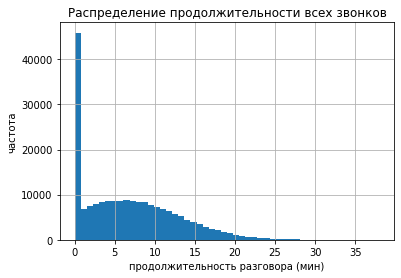

In [ ]:
ax = calls['duration'].hist(bins = 50);
ax.set_title('Распределение продолжительности всех звонков');
ax.set_xlabel('продолжительность разговора (мин)');
ax.set_ylabel('частота');

In [ ]:
calls['duration'].value_counts()

0.00     39613
4.49       142
5.50       142
6.15       141
6.38       141
         ...  
27.02        1
26.19        1
25.34        1
27.13        1
24.28        1
Name: duration, Length: 2871, dtype: int64

Огромное количество пропущенных звонков, которые не имеют значения для исследования

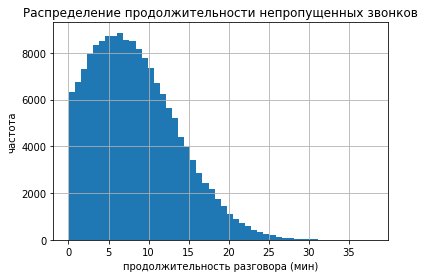

In [ ]:
ax = calls.query('duration > 0')['duration'].hist(bins = 50);
ax.set_title('Распределение продолжительности непропущенных звонков');
ax.set_xlabel('продолжительность разговора (мин)');
ax.set_ylabel('частота');

Данные колонки duration имеют скошенное левостороннее распределение, приближающееся к распределению Пуассона. Это ожидаемое распределение от данных, отражающих продолжительность события.

Значения от n.01 до n.59 нужно округлить до (n+1).00, исходя из кабальных правил компании.

### Internet

In [ ]:
internet = pd.read_csv('/datasets/internet.csv')

internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [ ]:
internet = internet.drop(columns = "Unnamed: 0")

Таблица internet (информация об интернет-сессиях):
* id — уникальный номер сессии
* mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
* session_date — дата интернет-сессии
* user_id — идентификатор пользователя

In [ ]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB


Данные не содержат пропусков.

Колонка unnamed: 0 соответствует номеру строки и может быть удалена.

Данные колонки session_date должны быть переведены в формат даты

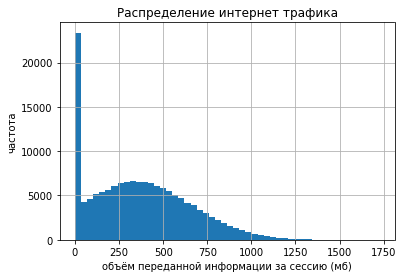

In [ ]:
ax = internet['mb_used'].hist(bins = 50);
ax.set_title('Распределение интернет трафика');
ax.set_xlabel('объём переданной информации за сессию (мб)');
ax.set_ylabel('частота');

Огромное количество малых сессий (с объёмом менее 1 мб) могут быть связаны с сообщениями в мессенджерах, push-уведомлениями и пр. Эти значения нужны, поскольку отражают активность абонента.

Данные колонки mb_used имеют скошенное левостороннее распределение, приближающееся к распределению Пуассона. Это ожидаемое распределение от данных, отражающих продолжительность события.

### Messages

In [ ]:
messages = pd.read_csv('/datasets/messages.csv')

messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


Таблица messages (информация о сообщениях):
* id — уникальный номер сообщения
* message_date — дата сообщения
* user_id — идентификатор пользователя, отправившего сообщение

In [ ]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Данные не содержат пропусков.

Данные колонки message_date должны быть переведены в формат даты

### Tariffs

In [ ]:
tariffs = pd.read_csv('/datasets/tariffs.csv')

tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Таблица tariffs (информация о тарифах):
* tariff_name — название тарифа
* rub_monthly_fee — ежемесячная абонентская плата в рублях
* minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
* messages_included — количество сообщений в месяц, включённых в абонентскую плату
* mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* rub_per_message — стоимость отправки сообщения сверх тарифного пакета
* rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

In [ ]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Данные не содержат пропусков

### Users

In [ ]:
users = pd.read_csv('/datasets/users.csv')

users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Таблица users (информация о пользователях):
* user_id — уникальный идентификатор пользователя
* first_name — имя пользователя
* last_name — фамилия пользователя
* age — возраст пользователя (годы)
* reg_date — дата подключения тарифа (день, месяц, год)
* churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* city — город проживания пользователя
* tarif — название тарифного плана

In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Колонка churn_date содержит пропуски, имеющие смысловое значение

Данные колонки user_id должны быть переведены в формат int64, а колонок churn_date и reg_date должны быть переведены в формат даты

Вывод: данные загружены, не имеют пропусков. Поскольку в задании необходимо изучить срезы по месяцам, даты следует привести к соответствующему виду

## Подготовка данных
* Приведите данные к нужным типам;
* Найдите и исправьте ошибки в данных, если они есть.

Поясните, какие ошибки вы нашли и как их исправили. В данных вы найдёте звонки с нулевой продолжительностью. Это не ошибка: нулями обозначены пропущенные звонки, поэтому их не нужно удалять.

Посчитайте для каждого пользователя:
* количество сделанных звонков и израсходованных минут разговора по месяцам;
* количество отправленных сообщений по месяцам;
* объем израсходованного интернет-трафика по месяцам;
* помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

### Переименование колонок

In [ ]:
tariffs = tariffs.rename(columns = {'tariff_name': 'tariff'})
messages = messages.rename(columns = {'id': 'message_id'})

### Изменение типа данных

In [ ]:
users['user_id'] = users['user_id'].astype(int)

users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


### Округление дат до месяцев

In [ ]:
#все даты приводятся к первому числу месяца

calls['call_date'] = calls['call_date'].astype('datetime64[M]')
internet['session_date'] = internet['session_date'].astype('datetime64[M]')
messages['message_date'] = messages['message_date'].astype('datetime64[M]')
users['churn_date'] = users['churn_date'].astype('datetime64[M]')
users['reg_date'] = users['reg_date'].astype('datetime64[M]')

### Приведение дат к единому названию

In [ ]:
#calls = calls.rename(columns = {'call_date':'date'})
#internet = internet.rename(columns = {'session_date':'date'})
#messages = messages.rename(columns = {'message_date':'date'})

### Округление секунд до минут

In [ ]:
calls['duration'] = np.ceil(calls['duration'])

### Расчёт новых колонок

#### Доход со звонков

In [ ]:
#количество сделанных звонков по месяцам
calls_per_month = calls.query('duration > 0').pivot_table(index = ('user_id', 'call_date'), values = 'duration', aggfunc = 'count')

In [ ]:
#количество израсходованных минут разговора по месяцам
minutes_per_month = np.ceil(calls.query('duration > 0').pivot_table(index = ('user_id', 'call_date'), values = 'duration', aggfunc = 'sum'))

In [ ]:
#для того, чтобы можно было обращаться к row['tariff'] в функции расчёта дохода, 
#следует превратить pivot table в data_frame (если есть иная возможность, подскажите, пожалуйста!)
minutes_per_month = minutes_per_month.reset_index()

In [ ]:
minutes_per_month

,user_id,call_date,duration
0,1000,2018-05-01,159.0
1,1000,2018-06-01,172.0
2,1000,2018-07-01,340.0
3,1000,2018-08-01,408.0
4,1000,2018-09-01,466.0
...,...,...,...
3163,1498,2018-10-01,247.0
3164,1499,2018-09-01,70.0
3165,1499,2018-10-01,449.0
3166,1499,2018-11-01,612.0


In [ ]:
minutes_per_month = minutes_per_month.merge(users)

In [ ]:
def revenue_calls(row):
    if row['tariff'] == 'smart':
        if row['duration'] <= int(tariffs.query('tariff == "smart"')['minutes_included']):        
            row['revenue_calls'] = 0
        else:
            row['revenue_calls'] = (row['duration'] - int(tariffs.query('tariff == "smart"')['minutes_included'])) * int(tariffs.query('tariff == "smart"')['rub_per_minute']) +int(tariffs.query('tariff == "smart"')['rub_monthly_fee'])
    else:
        if row['duration'] <= int(tariffs.query('tariff == "ultra"')['minutes_included']):
            row['revenue_calls'] = 0
        else:
            row['revenue_calls'] = (row['duration'] - int(tariffs.query('tariff == "ultra"')['minutes_included'])) * int(tariffs.query('tariff == "ultra"')['rub_per_minute']) + int(tariffs.query('tariff == "smart"')['rub_monthly_fee'])
    return row
    
minutes_per_month = minutes_per_month.apply(revenue_calls, axis=1)

In [ ]:
minutes_per_month

,user_id,call_date,duration,age,churn_date,city,first_name,last_name,reg_date,tariff,revenue_calls
0,1000,2018-05-01,159.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-01,ultra,0.0
1,1000,2018-06-01,172.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-01,ultra,0.0
2,1000,2018-07-01,340.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-01,ultra,0.0
3,1000,2018-08-01,408.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-01,ultra,0.0
4,1000,2018-09-01,466.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-01,ultra,0.0
...,...,...,...,...,...,...,...,...,...,...,...
3163,1498,2018-10-01,247.0,68,2018-10-01,Владикавказ,Всеволод,Акимчин,2018-07-01,smart,0.0
3164,1499,2018-09-01,70.0,35,NaT,Пермь,Гектор,Корнилов,2018-09-01,smart,0.0
3165,1499,2018-10-01,449.0,35,NaT,Пермь,Гектор,Корнилов,2018-09-01,smart,0.0
3166,1499,2018-11-01,612.0,35,NaT,Пермь,Гектор,Корнилов,2018-09-01,smart,886.0


In [ ]:
minutes_per_month.groupby('tariff')['duration', 'revenue_calls'].describe()

duration                                                            \
          count        mean         std  min    25%    50%    75%     max   
tariff                                                                      
smart    2221.0  419.440342  188.992403  2.0  285.0  423.0  546.0  1435.0   
ultra     947.0  547.755016  305.513385  1.0  311.0  529.0  758.0  1673.0   

       revenue_calls                                                        
               count        mean         std  min  25%  50%    75%     max  
tariff                                                                      
smart         2221.0  311.984241  472.892571  0.0  0.0  0.0  688.0  3355.0  
ultra          947.0    0.000000    0.000000  0.0  0.0  0.0    0.0     0.0

#### Доход с сообщений

In [ ]:
#количество отправленных сообщений по месяцам
messages_per_month = messages.pivot_table(index = ('user_id', 'message_date'), values = 'user_id', aggfunc = 'count')

In [ ]:
messages_per_month

message_id
user_id message_date            
1000    2018-05-01            22
        2018-06-01            60
        2018-07-01            75
        2018-08-01            81
        2018-09-01            57
...                          ...
1498    2018-10-01            42
1499    2018-09-01            11
        2018-10-01            48
        2018-11-01            59
        2018-12-01            66

[2717 rows x 1 columns]

In [ ]:
messages_per_month = messages_per_month.reset_index().rename(columns = {'message_id': 'n_messages'})

In [ ]:
messages_per_month = messages_per_month.merge(users)

In [ ]:
def revenue_messages(row):
    if row['tariff'] == 'smart':
        if row['n_messages'] > int(tariffs.query('tariff == "smart"')['messages_included']):        
            row['revenue_messages'] = (row['n_messages'] - int(tariffs.query('tariff == "smart"')['messages_included'])) * int(tariffs.query('tariff == "smart"')['rub_per_message'])
        else:
            row['revenue_messages'] = 0
    else:
        if row['n_messages'] > int(tariffs.query('tariff == "ultra"')['messages_included']):
            row['revenue_messages'] = (row['n_messages'] - int(tariffs.query('tariff == "ultra"')['messages_included'])) * int(tariffs.query('tariff == "ultra"')['rub_per_message'])
        else:
            row['revenue_messages'] = 0
    return row
    
messages_per_month = messages_per_month.apply(revenue_messages, axis=1)

In [ ]:
messages_per_month

,user_id,message_date,n_messages,age,churn_date,city,first_name,last_name,reg_date,tariff,revenue_messages
0,1000,2018-05-01,22,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-01,ultra,0
1,1000,2018-06-01,60,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-01,ultra,0
2,1000,2018-07-01,75,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-01,ultra,0
3,1000,2018-08-01,81,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-01,ultra,0
4,1000,2018-09-01,57,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-01,ultra,0
...,...,...,...,...,...,...,...,...,...,...,...
2712,1498,2018-10-01,42,68,2018-10-01,Владикавказ,Всеволод,Акимчин,2018-07-01,smart,0
2713,1499,2018-09-01,11,35,NaT,Пермь,Гектор,Корнилов,2018-09-01,smart,0
2714,1499,2018-10-01,48,35,NaT,Пермь,Гектор,Корнилов,2018-09-01,smart,0
2715,1499,2018-11-01,59,35,NaT,Пермь,Гектор,Корнилов,2018-09-01,smart,27


#### Доход с интернета

In [ ]:
#объем израсходованного интернет-трафика по месяцам
internet_per_month = np.ceil(internet.pivot_table(index = ('user_id', 'session_date'), values = 'mb_used', aggfunc = 'sum'))

In [ ]:
internet_per_month = internet_per_month.reset_index()
internet_per_month

,user_id,session_date,mb_used
0,1000,2018-05-01,2254.0
1,1000,2018-06-01,23234.0
2,1000,2018-07-01,14004.0
3,1000,2018-08-01,14056.0
4,1000,2018-09-01,14569.0
...,...,...,...
3198,1498,2018-10-01,20580.0
3199,1499,2018-09-01,1846.0
3200,1499,2018-10-01,17789.0
3201,1499,2018-11-01,17964.0


In [ ]:
internet_per_month = internet_per_month.merge(users)

In [ ]:
def revenue_internet(row):
    if row['tariff'] == 'smart':
        if row['mb_used'] > int(tariffs.query('tariff == "smart"')['mb_per_month_included']):        
            row['revenue_internet'] = np.ceil((row['mb_used'] - int(tariffs.query('tariff == "smart"')['mb_per_month_included']))/1000) * int(tariffs.query('tariff == "smart"')['rub_per_gb'])
        else:
            row['revenue_internet'] = 0
    else:
        if row['mb_used'] > int(tariffs.query('tariff == "ultra"')['mb_per_month_included']):
            row['revenue_internet'] = np.ceil((row['mb_used'] - int(tariffs.query('tariff == "ultra"')['mb_per_month_included']))/1000) * int(tariffs.query('tariff == "ultra"')['rub_per_gb'])
        else:
            row['revenue_internet'] = 0
    return row
    
internet_per_month = internet_per_month.apply(revenue_internet, axis=1)

In [ ]:
internet_per_month

,user_id,session_date,mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,revenue_internet
0,1000,2018-05-01,2254.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-01,ultra,0.0
1,1000,2018-06-01,23234.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-01,ultra,0.0
2,1000,2018-07-01,14004.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-01,ultra,0.0
3,1000,2018-08-01,14056.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-01,ultra,0.0
4,1000,2018-09-01,14569.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-01,ultra,0.0
...,...,...,...,...,...,...,...,...,...,...,...
3198,1498,2018-10-01,20580.0,68,2018-10-01,Владикавказ,Всеволод,Акимчин,2018-07-01,smart,1200.0
3199,1499,2018-09-01,1846.0,35,NaT,Пермь,Гектор,Корнилов,2018-09-01,smart,0.0
3200,1499,2018-10-01,17789.0,35,NaT,Пермь,Гектор,Корнилов,2018-09-01,smart,600.0
3201,1499,2018-11-01,17964.0,35,NaT,Пермь,Гектор,Корнилов,2018-09-01,smart,600.0


#### Объединение результатов

In [ ]:
minutes_per_month = minutes_per_month.rename(columns = {'call_date': 'month'})
messages_per_month = messages_per_month.rename(columns = {'message_date': 'month'})
internet_per_month = internet_per_month.rename(columns = {'session_date': 'month'})

In [ ]:
monthly_revenue = minutes_per_month[['tariff','user_id','month','revenue_calls']].merge(messages_per_month[['tariff','user_id','month','revenue_messages']], on = ('tariff','user_id','month'), how = 'outer')
monthly_revenue = monthly_revenue.merge(internet_per_month[['tariff','user_id','month','revenue_internet']], on = ('tariff','user_id','month'), how = 'outer')

In [ ]:
monthly_revenue = monthly_revenue.fillna(0)

In [ ]:
monthly_revenue['total_revenue'] = monthly_revenue['revenue_calls'] + monthly_revenue['revenue_messages'] + monthly_revenue['revenue_internet'] 

In [ ]:
monthly_revenue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 7 columns):
tariff              3214 non-null object
user_id             3214 non-null int64
month               3214 non-null datetime64[ns]
revenue_calls       3214 non-null float64
revenue_messages    3214 non-null float64
revenue_internet    3214 non-null float64
total_revenue       3214 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 200.9+ KB


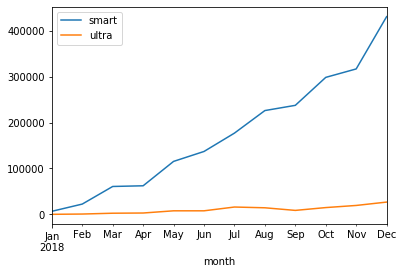

In [ ]:
ax = monthly_revenue.query('tariff == "smart"').pivot_table(index = 'month', values = 'total_revenue', aggfunc = 'sum').plot(label = 'smart');
monthly_revenue.query('tariff == "ultra"').pivot_table(index = 'month', values = 'total_revenue', aggfunc = 'sum').plot(ax = ax, label = 'ultra');
ax.legend(('smart', 'ultra'));

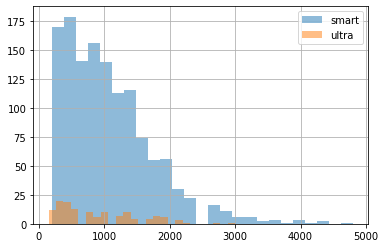

In [ ]:
internet_per_month.query('tariff == "smart" and revenue_internet > 0')['revenue_internet'].hist(bins = 25, alpha = 0.5, label = 'smart').legend();
internet_per_month.query('tariff == "ultra" and revenue_internet > 0')['revenue_internet'].hist(bins = 25, alpha = 0.5, label = 'ultra').legend();

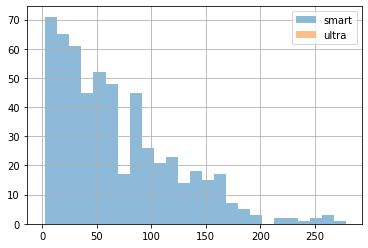

In [ ]:
messages_per_month.query('tariff == "smart" and revenue_messages > 0')['revenue_messages'].hist(bins = 25, alpha = 0.5, label = 'smart').legend();
messages_per_month.query('tariff == "ultra" and revenue_messages > 0')['revenue_messages'].hist(bins = 25, alpha = 0.5, label = 'ultra').legend();

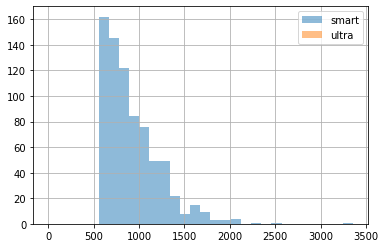

In [ ]:
minutes_per_month.query('tariff == "smart" and revenue_calls > 0')['revenue_calls'].hist(bins = 25, alpha = 0.5, label = 'smart').legend();
minutes_per_month.query('tariff == "ultra" and revenue_calls > 0')['revenue_calls'].hist(bins = 25, alpha = 0.5, label = 'ultra').legend();

Тариф "смарт" приносит доход со звонков, интернета и сообщений, а тариф "ультра" - только немного с интернета. Пользователи тарифа "ультра" не выходят за лимиты

#### Доход с абонентской платы

In [ ]:
monthly_revenue = monthly_revenue.merge(users)

In [ ]:
def revenue_fee(row):
    if row['tariff'] == 'smart':
        row['revenue_fee'] = int(tariffs.query('tariff == "smart"')['rub_monthly_fee'])
    else:
        row['revenue_fee'] = int(tariffs.query('tariff == "ultra"')['rub_monthly_fee'])
    return row
    
monthly_revenue = monthly_revenue.apply(revenue_fee, axis=1)

In [ ]:
monthly_revenue['total_revenue'] = monthly_revenue['total_revenue'] + monthly_revenue['revenue_fee']
monthly_revenue

,tariff,user_id,month,revenue_calls,revenue_messages,revenue_internet,total_revenue,age,churn_date,city,first_name,last_name,reg_date,revenue_fee
0,ultra,1000,2018-05-01,0.0,0.0,0.0,1950.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-01,1950
1,ultra,1000,2018-06-01,0.0,0.0,0.0,1950.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-01,1950
2,ultra,1000,2018-07-01,0.0,0.0,0.0,1950.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-01,1950
3,ultra,1000,2018-08-01,0.0,0.0,0.0,1950.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-01,1950
4,ultra,1000,2018-09-01,0.0,0.0,0.0,1950.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-01,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,smart,1489,2018-08-01,0.0,0.0,0.0,550.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-01,550
3210,smart,1489,2018-09-01,0.0,0.0,400.0,950.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-01,550
3211,smart,1489,2018-10-01,0.0,0.0,1000.0,1550.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-01,550
3212,smart,1489,2018-11-01,0.0,0.0,600.0,1150.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-01,550


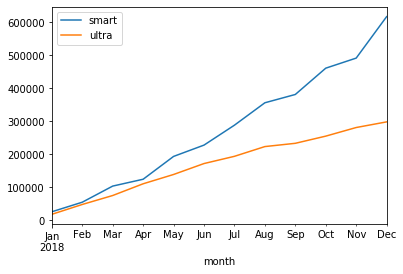

In [ ]:
ax = monthly_revenue.query('tariff == "smart"').pivot_table(index = 'month', values = 'total_revenue', aggfunc = 'sum').plot(label = 'smart');
monthly_revenue.query('tariff == "ultra"').pivot_table(index = 'month', values = 'total_revenue', aggfunc = 'sum').plot(ax = ax, label = 'ultra');
ax.legend(('smart', 'ultra'));

Тариф "смарт" приносит больший доход чем тариф "ультра" с учётом абонентской платы

## Анализ данных

Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

### Количество минут разговора в месяц

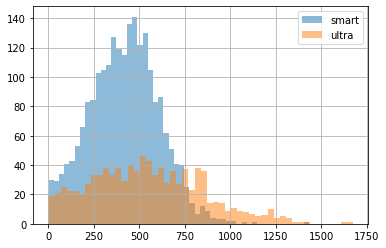

In [ ]:
minutes_per_month.query('tariff == "smart"')['duration'].hist(bins = 50, alpha = 0.5, label = 'smart').legend();
minutes_per_month.query('tariff == "ultra"')['duration'].hist(bins = 50, alpha = 0.5, label = 'ultra').legend();

In [ ]:
minutes_per_month.query('tariff == "smart"')['duration'].describe()

count    2221.000000
mean      419.440342
std       188.992403
min         2.000000
25%       285.000000
50%       423.000000
75%       546.000000
max      1435.000000
Name: duration, dtype: float64

In [ ]:
minutes_per_month.query('tariff == "ultra"')['duration'].describe()

count     947.000000
mean      547.755016
std       305.513385
min         1.000000
25%       311.000000
50%       529.000000
75%       758.000000
max      1673.000000
Name: duration, dtype: float64

In [ ]:
#дисперсия по тарифу смарт
np.var(minutes_per_month.query('tariff == "smart"')['duration'])

35702.04653099502

In [ ]:
#стандартное отклонение по тарифу смарт
np.sqrt(np.var(minutes_per_month.query('tariff == "smart"')['duration']))

188.9498518946099

In [ ]:
#дисперсия по тарифу ультра
np.var(minutes_per_month.query('tariff == "ultra"')['duration'])

93239.86606512647

In [ ]:
#стандартное отклонение по тарифу ультра
np.sqrt(np.var(minutes_per_month.query('tariff == "ultra"')['duration']))

305.35203628783364

Среднее значение по выборке тарифа "ультра" больше, чем "смарт".

Стандартное отклонение по выборке тарифа "ультра" больше, чем "смарт".

Распределения схожи, но выборка по тарифу "ультра" имеет большую положительную скошенность.

### Количество сообщений в месяц

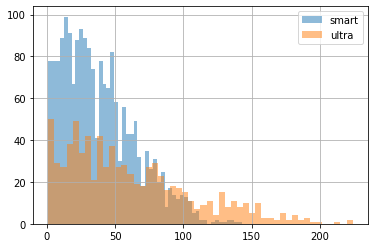

In [ ]:
messages_per_month.query('tariff == "smart"')['n_messages'].hist(bins = 50, alpha = 0.5, label = 'smart').legend();
messages_per_month.query('tariff == "ultra"')['n_messages'].hist(bins = 50, alpha = 0.5, label = 'ultra').legend();

In [ ]:
messages_per_month.query('tariff == "smart"')['n_messages'].describe()

count    1922.000000
mean       38.716441
std        26.787949
min         1.000000
25%        17.000000
50%        34.000000
75%        55.000000
max       143.000000
Name: n_messages, dtype: float64

In [ ]:
messages_per_month.query('tariff == "ultra"')['n_messages'].describe()

count    795.000000
mean      61.161006
std       45.931026
min        1.000000
25%       24.000000
50%       51.000000
75%       87.500000
max      224.000000
Name: n_messages, dtype: float64

In [ ]:
#дисперсия по тарифу смарт
np.var(messages_per_month.query('tariff == "smart"')['n_messages'])

717.220843110227

In [ ]:
#стандартное отклонение по тарифу смарт
np.sqrt(np.var(messages_per_month.query('tariff == "smart"')['n_messages']))

26.780979129042816

In [ ]:
#дисперсия по тарифу ультра
np.var(messages_per_month.query('tariff == "ultra"')['n_messages'])

2107.0055235156838

In [ ]:
#стандартное отклонение по тарифу ультра
np.sqrt(np.var(messages_per_month.query('tariff == "ultra"')['n_messages']))

45.90212983637779

Среднее значение по выборке тарифа "ультра" больше, чем "смарт".

Стандартное отклонение по выборке тарифа "ультра" больше, чем "смарт".

Распределение выборки по тарифу "ультра" имеет большую положительную скошенность, чем "смарт".

### Объём интернет-трафика в месяц

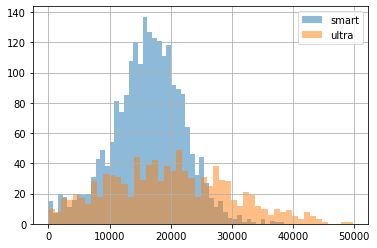

In [ ]:
internet_per_month.query('tariff == "smart"')['mb_used'].hist(bins = 50, alpha = 0.5, label = 'smart').legend();
internet_per_month.query('tariff == "ultra"')['mb_used'].hist(bins = 50, alpha = 0.5, label = 'ultra').legend();

In [ ]:
internet_per_month.query('tariff == "smart"')['mb_used'].describe()

count     2228.000000
mean     16216.148564
std       5861.741292
min          0.000000
25%      12650.000000
50%      16508.000000
75%      20044.000000
max      38553.000000
Name: mb_used, dtype: float64

In [ ]:
internet_per_month.query('tariff == "ultra"')['mb_used'].describe()

count      975.000000
mean     19668.993846
std       9943.067706
min          0.000000
25%      12008.500000
50%      19395.000000
75%      26897.000000
max      49746.000000
Name: mb_used, dtype: float64

In [ ]:
#дисперсия по тарифу смарт
np.var(internet_per_month.query('tariff == "smart"')['mb_used'])

34344589.06275826

In [ ]:
#стандартное отклонение по тарифу смарт
np.sqrt(np.var(internet_per_month.query('tariff == "smart"')['mb_used']))

5860.425672488156

In [ ]:
#дисперсия по тарифу ультра
np.var(internet_per_month.query('tariff == "ultra"')['mb_used'])

98763195.81739803

In [ ]:
#стандартное отклонение по тарифу ультра
np.sqrt(np.var(internet_per_month.query('tariff == "ultra"')['mb_used']))

9937.967388626208

Среднее значение по выборке тарифа "ультра" больше, чем "смарт".

Стандартное отклонение по выборке тарифа "ультра" больше, чем "смарт".

Распределения схожи, но выборка по тарифу "ультра" имеет большую положительную скошенность, хотя значение первого квартиля меньше, чем "смарт".

## Проверка гипотез

Критерий статистической значимости принимается 5%

### Выручка по тарифам

Нулевая гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» равна

Альтернативная гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» не равна

In [ ]:
results = st.ttest_ind(
    monthly_revenue.query('tariff == "smart"')['total_revenue'],
    monthly_revenue.query('tariff == "ultra"')['total_revenue'],
    equal_var = False)

print('p-значение: ', results.pvalue)

p-значение:  2.4993562363437228e-124


уровень статистической значимости выполнения нулевой гипотезы почти нулевой, и это означает, что нулевую гипотезу следует отвергнуть и принять альтернативную

### Выручка по городам

Нулевая гипотеза: средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов

Альтернативная гипотеза: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [ ]:
monthly_revenue.query('city == "Москва"')['total_revenue'].describe()

count     611.000000
mean     1667.253682
std       796.682111
min       550.000000
25%       950.000000
50%      1950.000000
75%      1950.000000
max      5871.000000
Name: total_revenue, dtype: float64

In [ ]:
monthly_revenue.query('city != "Москва"')['total_revenue'].describe()

count    2603.000000
mean     1668.194007
std       874.571806
min       550.000000
25%       950.000000
50%      1950.000000
75%      1950.000000
max      7520.000000
Name: total_revenue, dtype: float64

стандартное отклонение выборок различается

In [ ]:
results = st.ttest_ind(
    monthly_revenue.query('city == "Москва"')['total_revenue'],
    monthly_revenue.query('city != "Москва"')['total_revenue'],
    equal_var = False)

print('p-значение: ', results.pvalue)

p-значение:  0.9794551187108997


уровень статистической значимости выполнения нулевой гипотезы 97,9% => принимаем нулевую гипотезу

## Вывод

Входные данные duration и mb_used имеют скошенное левостороннее распределение, приближающееся к распределению Пуассона. Это ожидаемое распределение от данных, отражающих продолжительность событий.

Предобработка исходных данных включала переименование колонок, изменение типа данных, округление дат до месяцев, приведение дат к единому формату и округление секунд до минут.

Были рассчитаны колонки дохода по видам услуг исходя из тарифных планов, проанализированы объёмы пользования услугами, а также сформулированы и проверены статистические гипотезы.

В среднем пользователи тарифа "смарт" тратят 419 минут на разговоры в месяц (стандартное отклонение 189), а "ультра" - 548 (стандартное отклонение 305). Пользователи тарифа "смарт" тратят в среднем 39 сообщений в месяц (стандартное отклонение 27), а тарифа "ультра" - 61 (стандартное отклонение 46). На интернет пользователи тарифа "смарт" ежемесячно тратят 16 Гб (стандартное отклонение 6), а тарифа "ультра" - 20 Гб (стандартное отклонение  10). Распределения по видам услуг у разных тарифов отличается - тариф "ультра" имеет больший скос влево, что также отражает большие объёмы пользования услугами у клиентов этого тарифа.

Тариф "смарт" приносит доход со звонков, интернета и сообщений, а тариф "ультра" - только немного с интернета. Пользователи тарифа "ультра" не выходят за лимиты и приносят доход в основном в виде абонентской платы.

Средняя выручка у тарифов различается и тариф "смарт" приносит больший доход, чем тариф "ультра". Средняя выручка от пользователей Москвы не отличается значительно от средней выручки польователей других регионов.